In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet("../artifacts/train_data.parquet")

print("Shape:", df.shape)
df.head()


Shape: (118, 12)


,event_time,aqi_daily,pm10_mean,pm2_5_mean,ozone_mean,no2_mean,so2_mean,co_mean,weekday,label_aqi_day1,label_aqi_day2,label_aqi_day3
0,2025-10-09 00:00:00+00:00,88,100.595833,40.533333,61.458333,30.012500,21.095833,629.625000,Thursday,80.0,73.0,73.0
1,2025-10-10 00:00:00+00:00,80,81.704167,38.858333,68.375000,27.383333,19.225000,582.500000,Friday,73.0,73.0,72.0
2,2025-10-11 00:00:00+00:00,73,74.154167,41.454167,74.166667,27.458333,19.733333,727.333333,Saturday,73.0,72.0,71.0
3,2025-10-12 00:00:00+00:00,73,60.275000,38.383333,86.000000,24.300000,18.883333,582.916667,Sunday,72.0,71.0,68.0
4,2025-10-13 00:00:00+00:00,72,52.000000,38.283333,88.958333,22.254167,16.250000,603.583333,Monday,71.0,68.0,69.0


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype                  
---  ------          --------------  -----                  
 0   event_time      118 non-null    datetime64[us, Etc/UTC]
 1   aqi_daily       118 non-null    int64                  
 2   pm10_mean       118 non-null    float64                
 3   pm2_5_mean      118 non-null    float64                
 4   ozone_mean      118 non-null    float64                
 5   no2_mean        118 non-null    float64                
 6   so2_mean        118 non-null    float64                
 7   co_mean         118 non-null    float64                
 8   weekday         118 non-null    object                 
 9   label_aqi_day1  118 non-null    float64                
 10  label_aqi_day2  118 non-null    float64                
 11  label_aqi_day3  118 non-null    float64                
dtypes: datetime64[us, Etc/UTC](1), float

In [3]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
aqi_daily,118.0,74.305085,8.626642,60.000000,68.000000,73.000000,80.000000,101.000000
pm10_mean,118.0,47.015007,17.085812,22.229167,34.815625,44.104167,53.626042,114.629167
pm2_5_mean,118.0,37.385946,10.410031,19.137500,29.677083,35.566667,42.502083,72.420833
ozone_mean,118.0,76.956568,15.169992,48.583333,64.802083,73.500000,89.218750,115.041667
no2_mean,118.0,33.143150,10.776417,11.387500,24.808333,32.358333,41.630208,55.158333
so2_mean,118.0,21.900459,6.405888,10.783333,16.810417,20.770833,25.542708,36.737500
co_mean,118.0,901.635240,261.722415,397.291667,713.166667,890.833333,1088.875000,1752.416667
label_aqi_day1,118.0,74.211864,8.536349,60.000000,68.000000,73.000000,79.750000,101.000000
label_aqi_day2,118.0,74.127119,8.528030,60.000000,68.000000,73.000000,79.000000,101.000000
label_aqi_day3,118.0,74.127119,8.528030,60.000000,68.000000,73.000000,79.000000,101.000000


In [4]:
df.isna().sum()


event_time        0
aqi_daily         0
pm10_mean         0
pm2_5_mean        0
ozone_mean        0
no2_mean          0
so2_mean          0
co_mean           0
weekday           0
label_aqi_day1    0
label_aqi_day2    0
label_aqi_day3    0
dtype: int64

In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
df["event_time"] = pd.to_datetime(df["event_time"])
df = df.sort_values("event_time")


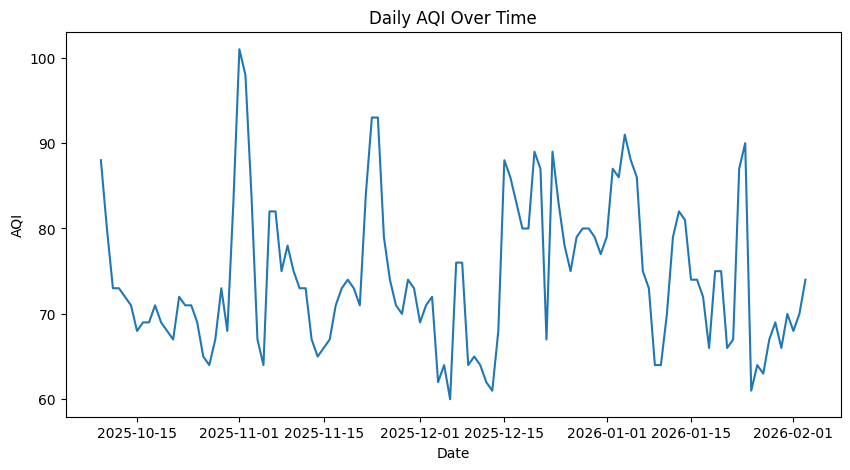

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df["event_time"], df["aqi_daily"])
plt.title("Daily AQI Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()


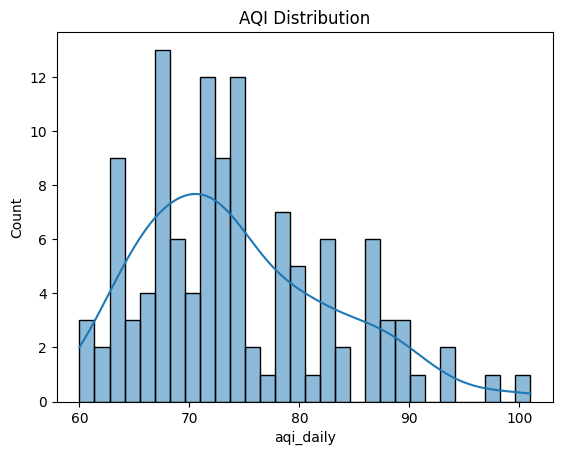

In [8]:
sns.histplot(df["aqi_daily"], bins=30, kde=True)
plt.title("AQI Distribution")
plt.show()


In [9]:
print("Skewness:", df["aqi_daily"].skew())
print("Kurtosis:", df["aqi_daily"].kurt())


Skewness: 0.7275200184287026
Kurtosis: 0.05744365524341832


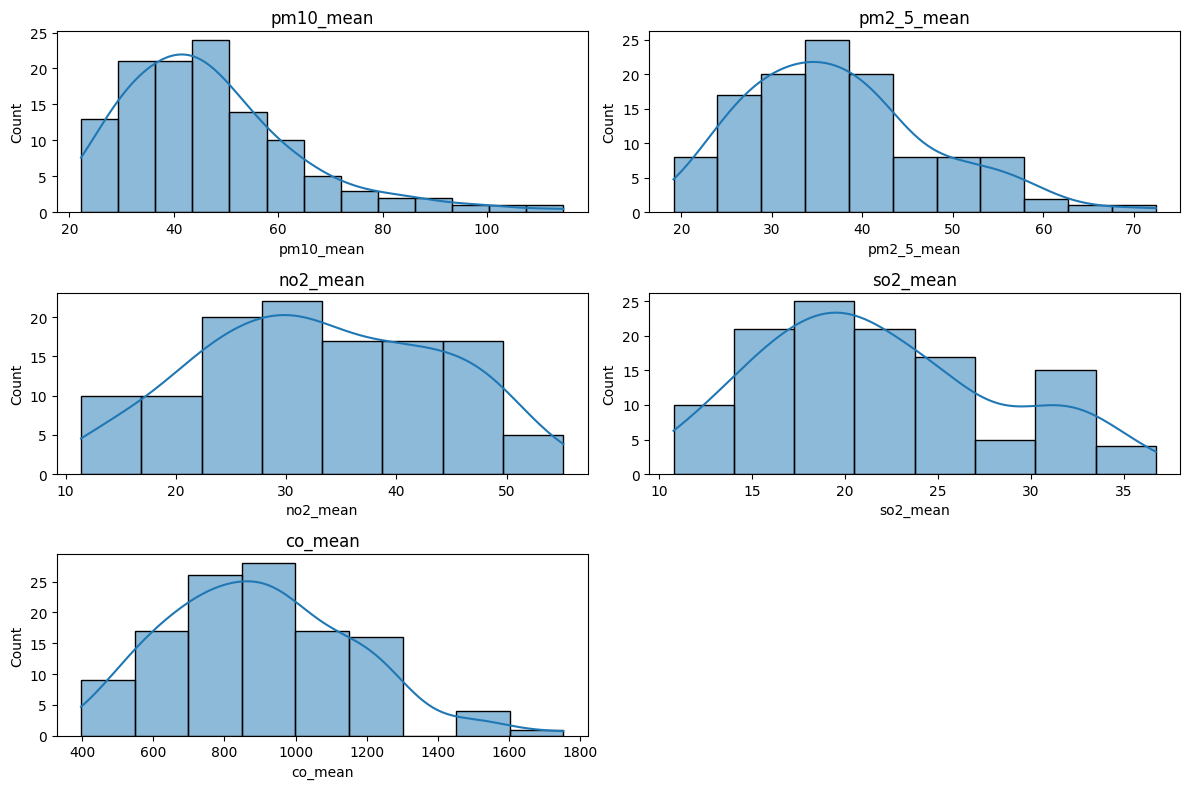

In [10]:
pollutants = ["pm10_mean","pm2_5_mean","no2_mean","so2_mean","co_mean"]

plt.figure(figsize=(12,8))
for i,col in enumerate(pollutants,1):
    plt.subplot(3,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


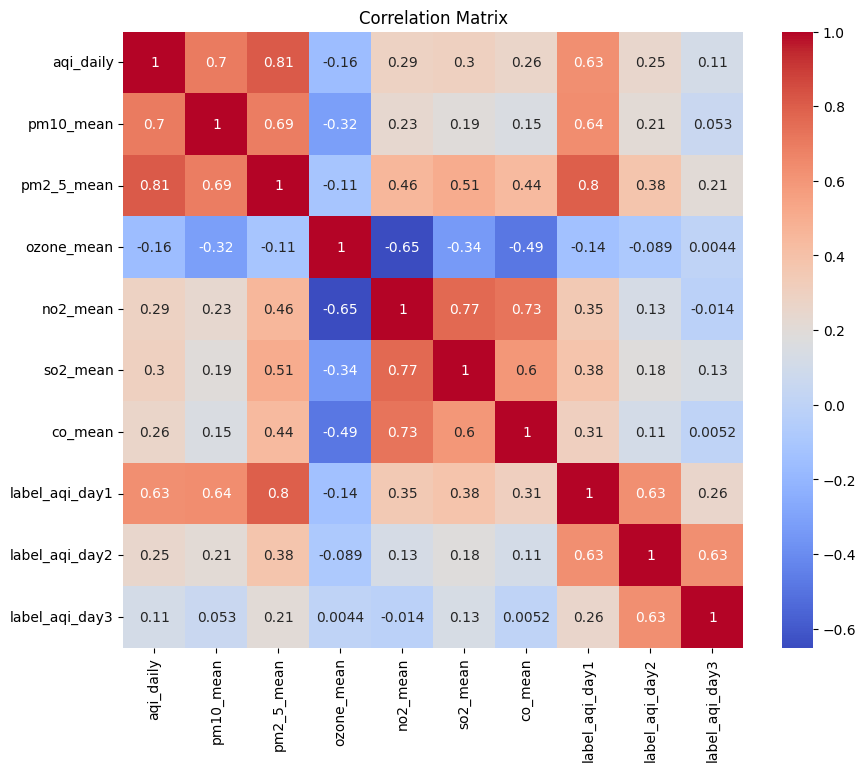

In [11]:
numeric_df = df.drop(columns=["event_time","weekday"], errors="ignore")

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [12]:
corr_with_target = numeric_df.corr()["aqi_daily"].sort_values(ascending=False)
corr_with_target


aqi_daily         1.000000
pm2_5_mean        0.806985
pm10_mean         0.703219
label_aqi_day1    0.630159
so2_mean          0.300950
no2_mean          0.288466
co_mean           0.263743
label_aqi_day2    0.251226
label_aqi_day3    0.113090
ozone_mean       -0.162275
Name: aqi_daily, dtype: float64

In [13]:
df["month"] = df["event_time"].dt.month
df["dayofweek"] = df["event_time"].dt.dayofweek


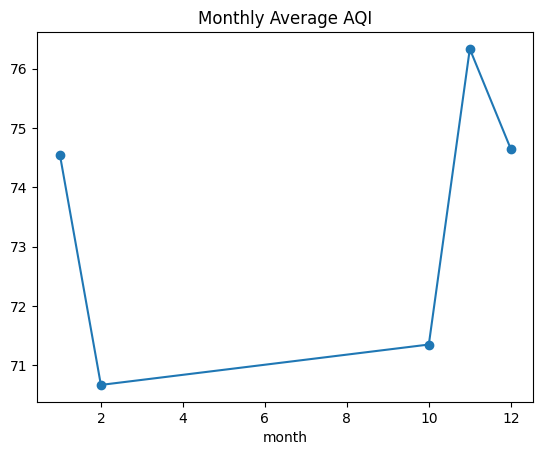

In [14]:
df.groupby("month")["aqi_daily"].mean().plot(marker="o")
plt.title("Monthly Average AQI")
plt.show()


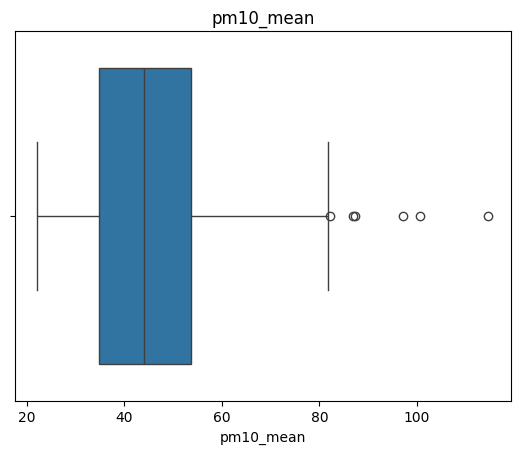

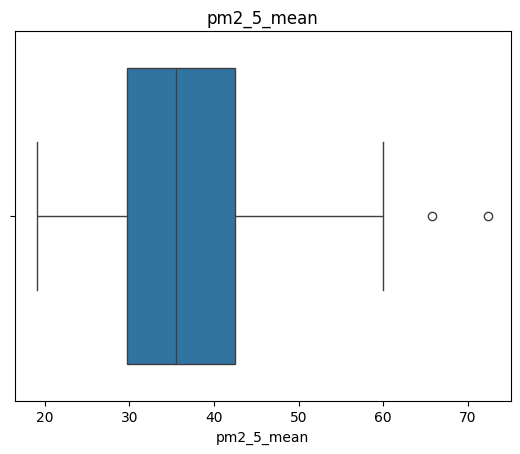

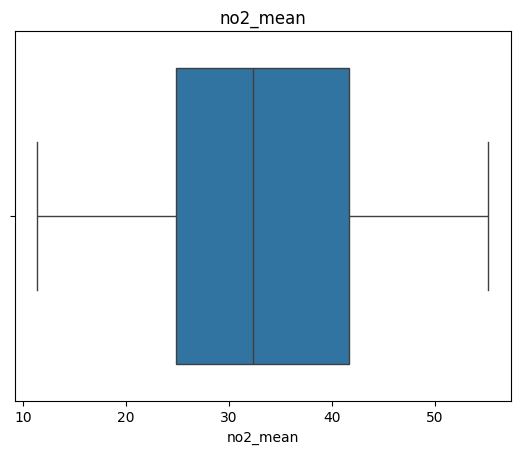

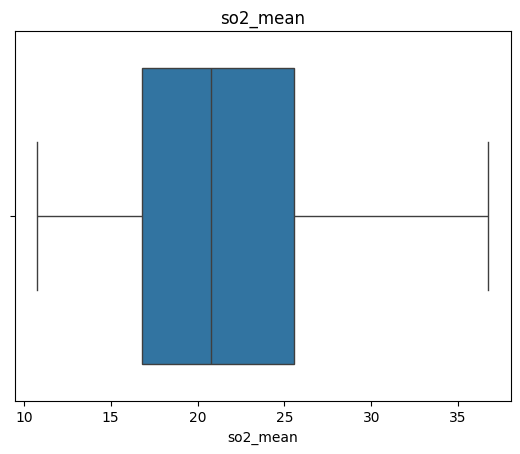

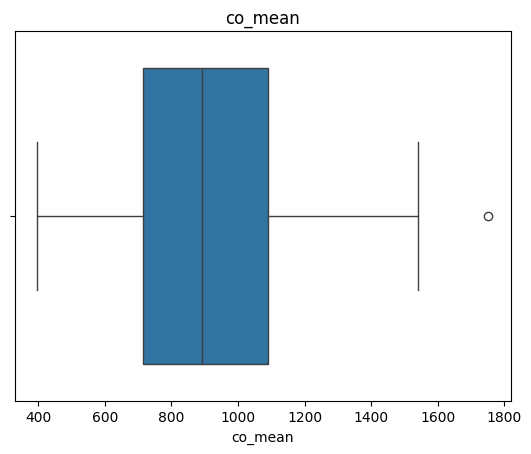

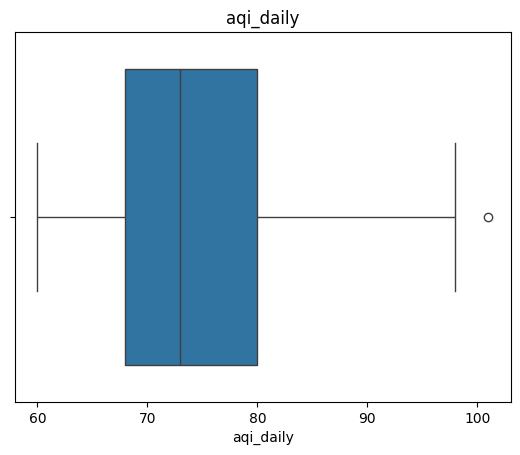

In [15]:
for col in pollutants + ["aqi_daily"]:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [16]:
for col in pollutants:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    print(col, lower, upper)


pm10_mean 23.581375 100.00933333333333
pm2_5_mean 20.224 64.80299999999998
no2_mean 12.078083333333334 54.61904166666667
so2_mean 11.005208333333332 35.699749999999995
co_mean 454.89375 1535.8425


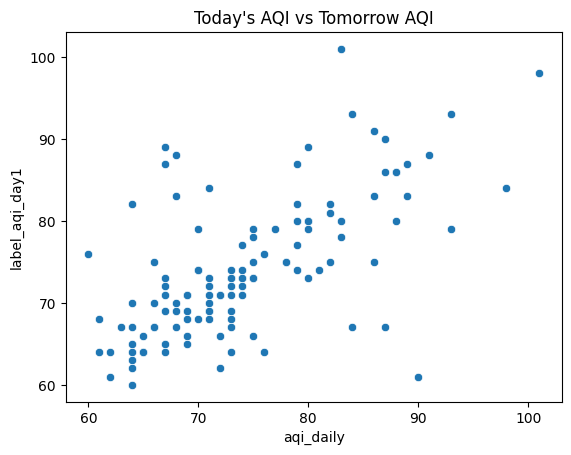

In [17]:
sns.scatterplot(x=df["aqi_daily"], y=df["label_aqi_day1"])
plt.title("Today's AQI vs Tomorrow AQI")
plt.show()


In [18]:
corr_matrix = numeric_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = [column for column in upper.columns if any(upper[column] > 0.9)]
high_corr


[]

In [19]:
pip install shap==0.46.0 xgboost==1.7.6


Note: you may need to restart the kernel to use updated packages.Collecting shap==0.46.0
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.2.0
    Uninstalling xgboost-3.2.0:
      Successfully uninstalled xgboost-3.2.0
  Attempting uninstall: shap
    Found existing installation: shap 0.49.1
    Uninstalling shap-0.49.1:
      Successfully uninstalled shap-0.49.1



You should consider upgrading via the 'c:\Users\wasay\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_parquet("../artifacts/train_data.parquet")

df["event_time"] = pd.to_datetime(df["event_time"])

# ✅ Choose which horizon you are explaining
TARGET = "label_aqi_day1"   # or label_aqi_day2 / label_aqi_day3

drop_cols = ["event_time", "label_aqi_day1", "label_aqi_day2", "label_aqi_day3"]
X = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")
y = df[TARGET].astype(float)

# ✅ Fix: weekday is string -> make numeric
if "weekday" in X.columns and X["weekday"].dtype == "object":
    X["weekday"] = pd.Categorical(X["weekday"]).codes


In [2]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None
,feature_types,None


c:\Users\wasay\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


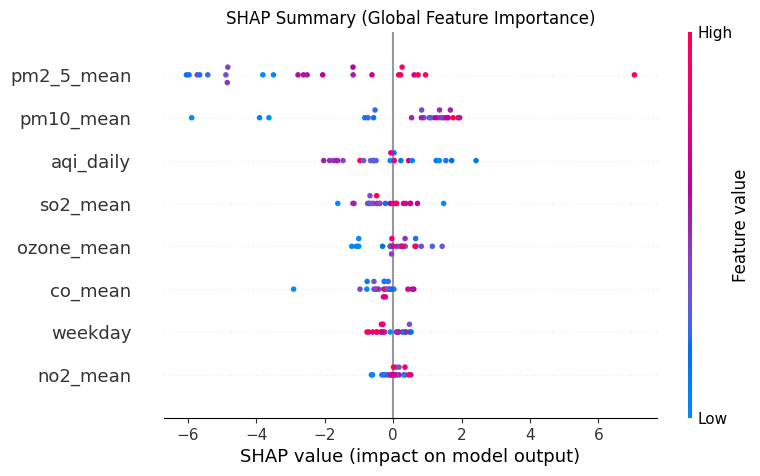

In [3]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary (Global Feature Importance)")
plt.show()


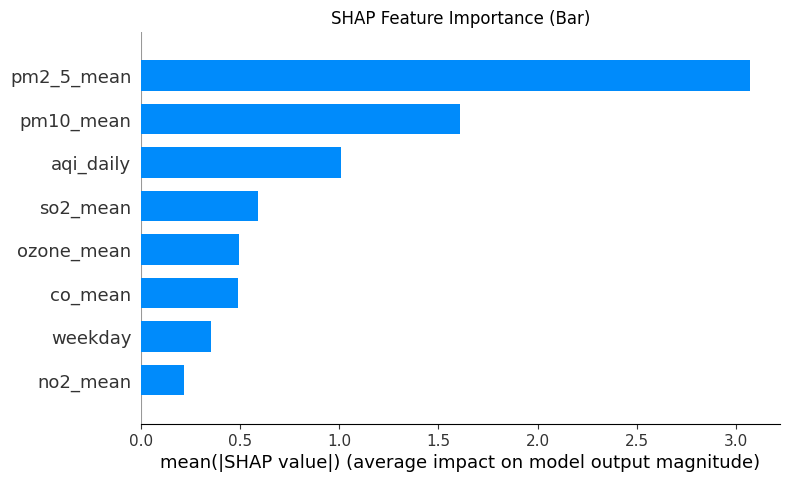

In [4]:
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar)")
plt.show()


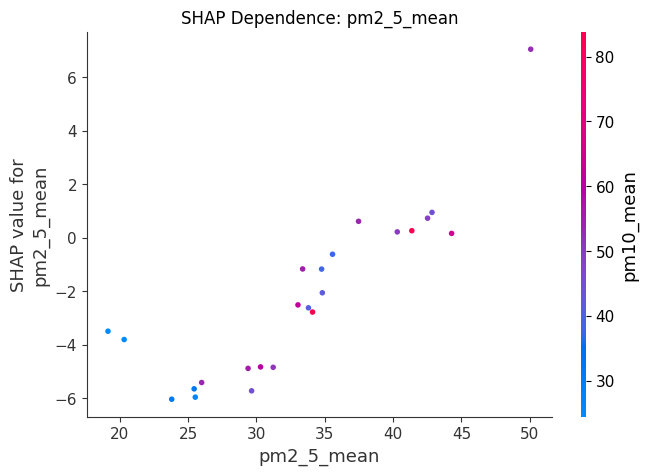

In [5]:
top_feature = X_test.columns[np.abs(shap_values).mean(0).argmax()]
shap.dependence_plot(top_feature, shap_values, X_test, show=False)
plt.title(f"SHAP Dependence: {top_feature}")
plt.show()


In [6]:
i = 0  # choose row
shap.initjs()

shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_test.iloc[i],
)


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("MAE:", round(mae,2))
print("RMSE:", round(rmse,2))
print("R2:", round(r2,3))


MAE: 4.69
RMSE: 6.61
R2: 0.187


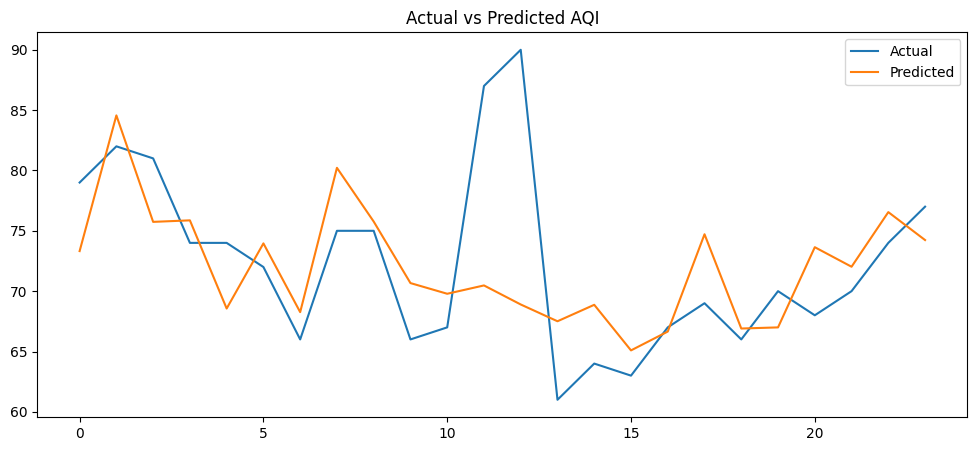

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(preds[:200], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted AQI")
plt.show()


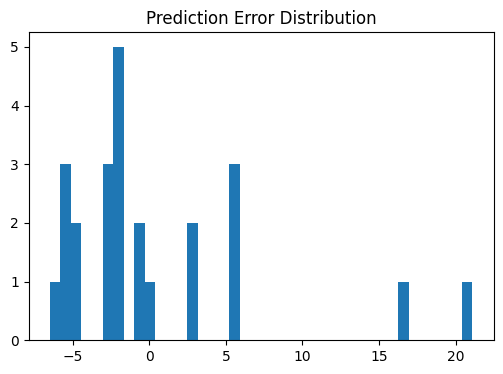

In [9]:
errors = y_test - preds

plt.figure(figsize=(6,4))
plt.hist(errors, bins=40)
plt.title("Prediction Error Distribution")
plt.show()


In [10]:
import joblib
joblib.dump(model, "../artifacts/model_day1.pkl")


['../artifacts/model_day1.pkl']

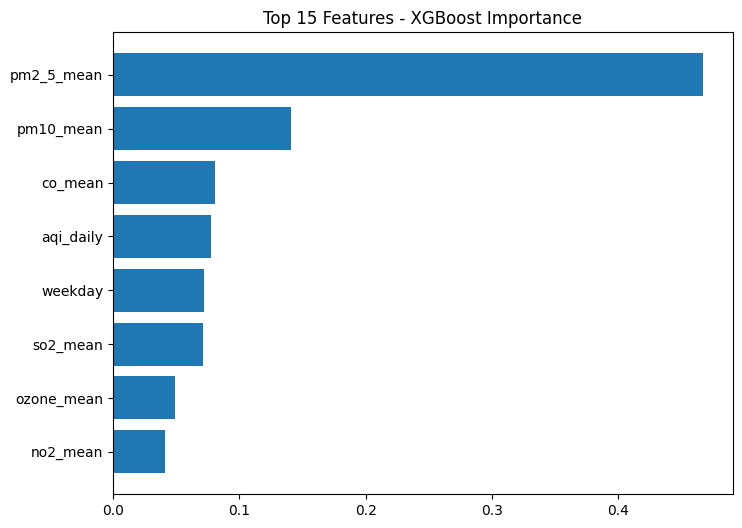

,feature,xgb_importance
2,pm2_5_mean,0.467348
1,pm10_mean,0.140775
6,co_mean,0.080450
0,aqi_daily,0.077769
7,weekday,0.071759
5,so2_mean,0.071600
3,ozone_mean,0.048926
4,no2_mean,0.041373


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Get importance from model
xgb_importance = model.feature_importances_

feat_imp_xgb = pd.DataFrame({
    "feature": X_train.columns,
    "xgb_importance": xgb_importance
}).sort_values("xgb_importance", ascending=False)

# Plot Top 15
plt.figure(figsize=(8,6))
plt.barh(feat_imp_xgb["feature"][:15], feat_imp_xgb["xgb_importance"][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Features - XGBoost Importance")
plt.show()

feat_imp_xgb.head(10)


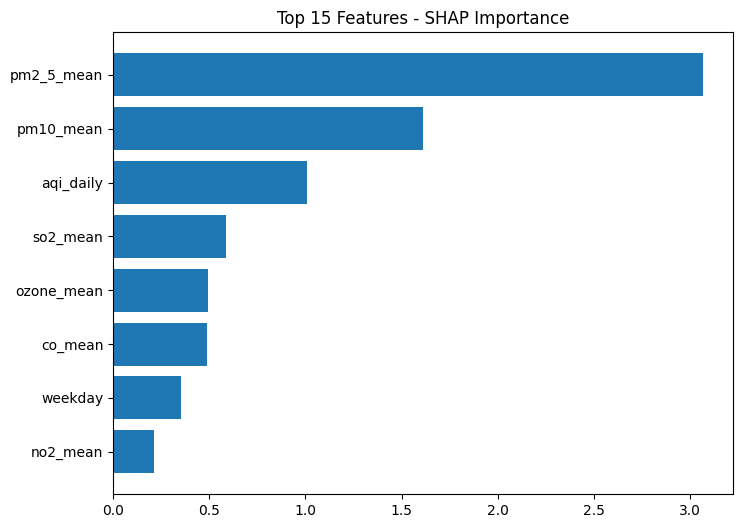

,feature,shap_importance
2,pm2_5_mean,3.069419
1,pm10_mean,1.608994
0,aqi_daily,1.010886
5,so2_mean,0.587242
3,ozone_mean,0.494557
6,co_mean,0.487939
7,weekday,0.352416
4,no2_mean,0.215811


In [12]:
import shap
import numpy as np

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Mean absolute SHAP values
shap_importance = np.abs(shap_values.values).mean(axis=0)

feat_imp_shap = pd.DataFrame({
    "feature": X_test.columns,
    "shap_importance": shap_importance
}).sort_values("shap_importance", ascending=False)

# Plot Top 15
plt.figure(figsize=(8,6))
plt.barh(feat_imp_shap["feature"][:15], feat_imp_shap["shap_importance"][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Features - SHAP Importance")
plt.show()

feat_imp_shap.head(10)


In [13]:
comparison = feat_imp_xgb.merge(
    feat_imp_shap,
    on="feature"
).sort_values("shap_importance", ascending=False)

comparison.head(15)


,feature,xgb_importance,shap_importance
0,pm2_5_mean,0.467348,3.069419
1,pm10_mean,0.140775,1.608994
3,aqi_daily,0.077769,1.010886
5,so2_mean,0.071600,0.587242
6,ozone_mean,0.048926,0.494557
2,co_mean,0.080450,0.487939
4,weekday,0.071759,0.352416
7,no2_mean,0.041373,0.215811
